# DS 3000

**Student Name**: Damian Uduevbo

**Date**: 06/12/2022

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split

Include any previous data preparation steps, EDA and visualizations. Its ok to copy and paste your code. However, ensure that you update the code based on the previous feedback from the TAs.

In [ ]:
df = pd.read_csv('green_tripdata_2021-12.csv', low_memory=False)
df = df.drop(columns='ehail_fee')

df['payment_type'].fillna(5, inplace = True)
df['trip_type'].fillna(0, inplace = True)
df['RatecodeID'].fillna(0, inplace = True)

df['congestion_surcharge'].fillna(0, inplace = True)
df['store_and_fwd_flag'].fillna('N', inplace = True)

# get all non zeros
df = df.loc[df["total_amount"] > 0 ]
df = df.loc[df["trip_distance"] > 0 ]

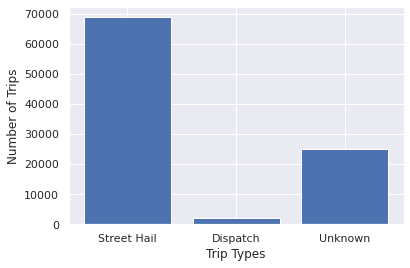

In [ ]:
tripTypeArr = {}

for e in df['trip_type']:
  if e in tripTypeArr:
    tripTypeArr[e] += 1
  else: tripTypeArr[e] = 1

dataPlotSize = range(len(tripTypeArr))
values = list(tripTypeArr.values())

plt.bar(dataPlotSize, values, tick_label=['Street Hail', 'Dispatch', 'Unknown'])

plt.xlabel("Trip Types")
plt.ylabel("Number of Trips")
plt.show()

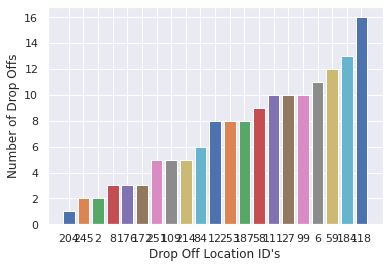

In [ ]:
dropOffArr = {}

for dfElement in df['DOLocationID']:
  if dfElement in dropOffArr:
    dropOffArr[dfElement] += 1
  else:
    dropOffArr[dfElement] = 1

# print(dropOffArr)
count = 0

sortedData = sorted(dropOffArr.items(), key=lambda v: v[1])
dropOffHashMap = dict(sortedData)

for e in dropOffHashMap.keys():
  if count <= 20:
    plt.bar(str(e), dropOffHashMap[e])
    count += 1

plt.xlabel("Drop Off Location ID's")
plt.ylabel("Number of Drop Offs")
plt.show()

In [ ]:
# df.shape
# df.dtypes
print('Dimensions:', df.shape)
print('DataTypes of columns:', df.dtypes)

Dimensions: (95862, 19)
DataTypes of columns: VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object


In [ ]:
minIdx = df['total_amount'].idxmin()
maxIdx = df['total_amount'].idxmax()

minCost = df['total_amount'].min()
maxCost = df['total_amount'].max()

minDist = df.loc[minIdx]['trip_distance']
maxDist = df.loc[maxIdx]['trip_distance']

print("Least expensive trip:", minCost, "\n * Miles traveled:", minDist)
print()
print("Most expensive trip:", maxCost, "\n * Miles traveled:", maxDist)

Least expensive trip: 0.01 
 * Miles traveled: 1.8

Most expensive trip: 533.3 
 * Miles traveled: 102.57


**1. Partition the data into train/test split.**

**2. Select the required features to build your model based on the insights from your EDA. Briefly explain the reason for the features that you selected. Ensure that you encode any categorical features.**

In [ ]:
dependent = df[['tip_amount']]

factors = df.drop('tip_amount', axis = 1)
factors = df[['trip_distance', 'fare_amount', 'payment_type']]

In [ ]:
trainFactors, testFactors, trainDependent, testDependent = train_test_split(
    factors, dependent, test_size=0.3, random_state=7) 

The factors I chose were *fare amount*, *trip distance*, and *payment type* because there is a large set of their given data and they are most likely to determine if a customers tips at all, and the amount that they tip.

**Build a model that predicts the tip amount.**

In [ ]:
treeReg = DecisionTreeRegressor(random_state = 7)
treeReg.fit(trainFactors, trainDependent)


DecisionTreeRegressor(random_state=7)

**Evaluate the predictions from your model and comment on the results. Ensure that you choose the correct metric. Remember that we evaluate models differently depending on the task, i.e. classification or regression.**

In [ ]:
print('Predicted tip:', treeReg.predict(testFactors))

Predicted tip: [0.   0.   0.   ... 0.   0.   1.98]


We use decision tree regression because our target is numerical

In [ ]:
meanErr = mean_squared_error(testDependent, treeReg.predict(testFactors))
print('Mean squared error:', meanErr)

Mean squared error: 6.630745938321982


Because we used a regression model we must need to use mean squared error (MSE), which is supposed to give us an estimate of how close we are to the true tip amount(s).